Challenge Set 6  
Topic:        Classification Errors  
Date:         07/28/2016  
Name:         Avi Grunwald  
Worked with:  

**Challenge 1**

In [1]:
import pandas as pd
import numpy as np

In [2]:
house = pd.read_csv('/home/avi/Documents/metis/Projects/Challenges/house-votes-84.data', header=None)

In [3]:
house.replace(['y', 'n', '?'], [1, 0, np.nan], inplace=True)

In [4]:
means = [ house[x].mean() for x in house if x!=0 ]
means_vote = [ round(house[x].mean()) for x in house if x!=0 ]

In [5]:
for x in range(1, len(house.columns)):
        house[x] = house[x].replace(np.nan, means_vote[x-1])

In [6]:
house.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [7]:
parties = house[0].replace(['republican', 'democrat'], [0, 1])

In [8]:
from sklearn.cross_validation import train_test_split

X = house.iloc[:,1:]
y = parties

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k_accs = []
k_just_accs = []

for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    k_just_accs.append(accuracy_score(y_test, neigh.predict(x_test)))
    k_accs.append( [i, accuracy_score(y_test, neigh.predict(x_test))] )

In [11]:
max(k_accs, key=lambda x: x[1])

[4, 0.92366412213740456]

In [20]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)
print ('Accuracy Score: {}'.format(accuracy_score(y_test, neigh.predict(x_test))))
print ('Precision Score: {}'.format(precision_score(y_test, neigh.predict(x_test))))
print ('Recall Score: {}'.format(recall_score(y_test, neigh.predict(x_test))))
print ('F1 Score: {}'.format(f1_score(y_test, neigh.predict(x_test))))

Accuracy Score: 0.9236641221374046
Precision Score: 0.935064935064935
Recall Score: 0.935064935064935
F1 Score: 0.935064935064935


In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
log_acc = accuracy_score(y_test, logreg.predict(x_test))

mod = logreg
print ('Accuracy Score: {}'.format(accuracy_score(y_test, mod.predict(x_test))))
print ('Precision Score: {}'.format(precision_score(y_test, mod.predict(x_test))))
print ('Recall Score: {}'.format(recall_score(y_test, mod.predict(x_test))))
print ('F1 Score: {}'.format(f1_score(y_test, mod.predict(x_test))))

Accuracy Score: 0.9389312977099237
Precision Score: 0.9259259259259259
Recall Score: 0.974025974025974
F1 Score: 0.949367088607595


In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

mod = nb
print ('Accuracy Score: {}'.format(accuracy_score(y_test, mod.predict(x_test))))
print ('Precision Score: {}'.format(precision_score(y_test, mod.predict(x_test))))
print ('Recall Score: {}'.format(recall_score(y_test, mod.predict(x_test))))
print ('F1 Score: {}'.format(f1_score(y_test, mod.predict(x_test))))

Accuracy Score: 0.9389312977099237
Precision Score: 0.9259259259259259
Recall Score: 0.974025974025974
F1 Score: 0.949367088607595


In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

mod = svc
print ('Accuracy Score: {}'.format(accuracy_score(y_test, mod.predict(x_test))))
print ('Precision Score: {}'.format(precision_score(y_test, mod.predict(x_test))))
print ('Recall Score: {}'.format(recall_score(y_test, mod.predict(x_test))))
print ('F1 Score: {}'.format(f1_score(y_test, mod.predict(x_test))))

Accuracy Score: 0.9541984732824428
Precision Score: 0.9493670886075949
Recall Score: 0.974025974025974
F1 Score: 0.9615384615384615


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

mod = dtc
print ('Accuracy Score: {}'.format(accuracy_score(y_test, mod.predict(x_test))))
print ('Precision Score: {}'.format(precision_score(y_test, mod.predict(x_test))))
print ('Recall Score: {}'.format(recall_score(y_test, mod.predict(x_test))))
print ('F1 Score: {}'.format(f1_score(y_test, mod.predict(x_test))))

Accuracy Score: 0.9389312977099237
Precision Score: 0.948051948051948
Recall Score: 0.948051948051948
F1 Score: 0.948051948051948


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

mod = rfc
print ('Accuracy Score: {}'.format(accuracy_score(y_test, mod.predict(x_test))))
print ('Precision Score: {}'.format(precision_score(y_test, mod.predict(x_test))))
print ('Recall Score: {}'.format(recall_score(y_test, mod.predict(x_test))))
print ('F1 Score: {}'.format(f1_score(y_test, mod.predict(x_test))))

Accuracy Score: 0.9541984732824428
Precision Score: 0.9382716049382716
Recall Score: 0.987012987012987
F1 Score: 0.9620253164556961


**Challenge 2**

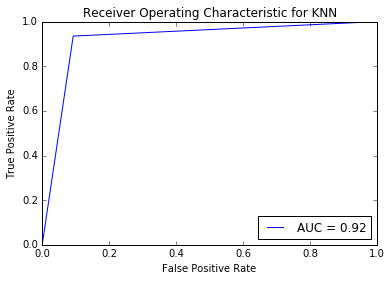

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, neigh.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for KNN')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

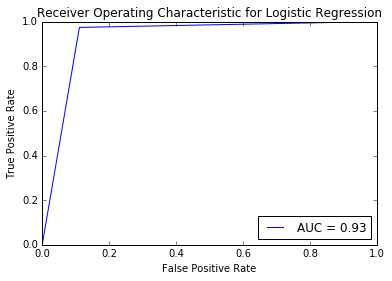

In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

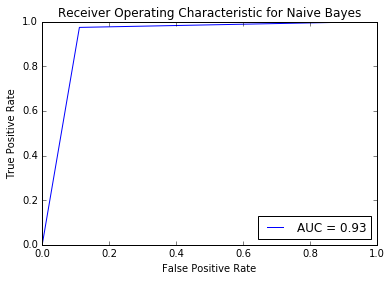

In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, nb.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

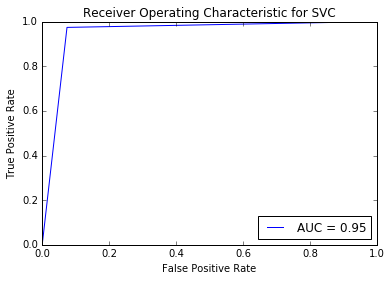

In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, svc.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for SVC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

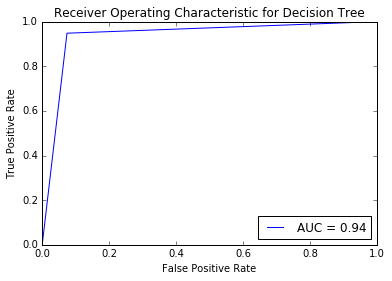

In [34]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dtc.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

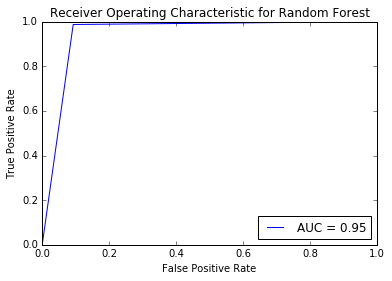

In [35]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

All models variables = neigh, logreg, nb, svc, dtc, rfc

**Challenge 3**

In [43]:
from sklearn.cross_validation import cross_val_score

for mod in ['neigh', 'logreg', 'nb', 'svc', 'dtc', 'rfc']:
    print ('{} Accuracy: {}'.format(mod, np.mean(cross_val_score(eval(mod), X, y, scoring='accuracy'))) )
    print ('{} Recall: {}'.format(mod, np.mean(cross_val_score(eval(mod), X, y, scoring='recall'))) )
    print ('{} Precision: {}'.format(mod, np.mean(cross_val_score(eval(mod), X, y, scoring='precision'))) )
    print ('{} F1: {}'.format(mod, np.mean(cross_val_score(eval(mod), X, y, scoring='f1'))) )
    print ('')

# print ('LR: {}'.format(np.mean(cross_val_score(nb, X, y, scoring='recall'))) )
# print ('NP: {}'.format(np.mean(cross_val_score(nb, X, y, scoring='recall'))) )
# print ('SVC: {}'.format(np.mean(cross_val_score(svc, X, y))) )
# print ('DTC: {}'.format(np.mean(cross_val_score(dtc, X, y))) )
# print ('RFC: {}'.format(np.mean(cross_val_score(rfc, X, y))) )

neigh Accuracy: 0.9057471264367815
neigh Recall: 0.8913857677902621
neigh Precision: 0.952060512841831
neigh F1: 0.9203638365488076

logreg Accuracy: 0.960919540229885
logreg Recall: 0.9700374531835205
logreg Precision: 0.9668283083842857
logreg F1: 0.9680987263341337

nb Accuracy: 0.9264367816091954
nb Recall: 0.9400749063670412
nb Precision: 0.9407769163925033
nb F1: 0.9399341271624247

svc Accuracy: 0.9563218390804598
svc Recall: 0.947565543071161
svc Precision: 0.9808675866688926
svc F1: 0.9636444277189398

dtc Accuracy: 0.9402298850574713
dtc Recall: 0.9250936329588014
dtc Precision: 0.9725829725829725
dtc F1: 0.9396713859996985

rfc Accuracy: 0.9540229885057472
rfc Recall: 0.947565543071161
rfc Precision: 0.9806979720727242
rfc F1: 0.9657695322707082



**Challenge 4**

In [52]:
from datetime import datetime

data_start = pd.read_csv('movies_list_all_df.csv', index_col=0)
movie_data = pd.read_csv('2013_movies.csv')
                        
data_start['rdm'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%B'))
data_start['rdy'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').strftime('%Y'))
data_start['Release Date'] = data_start['Release Date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
# data_start['rd'] = pd.to_datetime(data_start.rd)

data_start['Domestic Total Gross'] = data_start['Domestic Total Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))
data_start['Opening Weekend Gross'] = data_start['Opening Weekend Gross'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])))

data_start['Runtime'].fillna(value='0 hrs. 0 min.', inplace=True)
data_start['Runtime'] = data_start['Runtime'].str.replace(' min.', '').str.split(' hrs. ').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data_start = data_start[data_start['Runtime']!=0]
                         
data_start.columns = [ 'title', 'dtg', 'dist', 'rd', 'run', 'rating', 'pb', 'owg', 'owt', 'act', 'series', 'rdm', 'rdy']
data_start.head()

,title,dtg,dist,rd,run,rating,pb,owg,owt,act,series,rdm,rdy
0,Star Wars: The Force Awakens,936662225,Buena Vista,2015-12-18,136,PG-13,$245 million,247966675,"4,134",15,Yes,December,2015
1,Marvel's The Avengers,623357910,Buena Vista,2012-05-04,142,PG-13,$220 million,207438708,"4,349",13,Yes,May,2012
2,Jurassic World,652270625,Universal,2015-06-12,124,PG-13,$150 million,208806270,"4,274",7,Yes,June,2015
3,Avengers: Age of Ultron,459005868,Buena Vista,2015-05-01,141,PG-13,$250 million,191271109,"4,276",19,Yes,May,2015
4,The Dark Knight,533345358,Warner Bros.,2008-07-18,150,PG-13,$185 million,158411483,"4,366",11,Yes,July,2008


In [54]:
from patsy import dmatrices

y, X = dmatrices('series ~ dtg + run + rating + owg + act + rdm + rdy', data=data_start, return_type='dataframe')

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y['series[Yes]'], test_size=.30, random_state=4444)

In [56]:
series_accs = []
series_just_accs = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    series_just_accs.append(accuracy_score(y_test, knn.predict(x_test)))
    series_accs.append( [i, accuracy_score(y_test, knn.predict(x_test))] )

In [57]:
max(series_accs, key=lambda x: x[1])

[15, 0.88777698355968548]

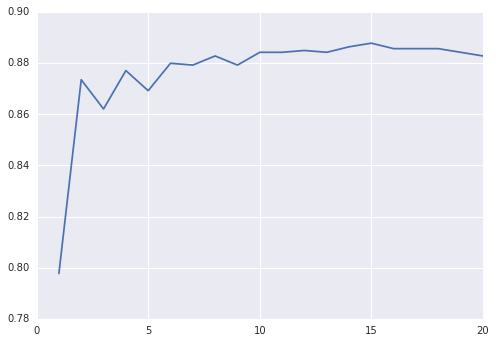

In [58]:
plt.plot(range(1,21), series_just_accs)
plt.show()

In [59]:
print ('KNN: {}'.format(np.mean(cross_val_score(knn, X, y))) )

KNN: 0.8676533676533676


In [61]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy_score(y_test, logreg.predict(x_test))

0.83059328091493922

In [62]:
# Baseline if just predicted always not a series
accuracy_score(y_test, [0 for x in y_test ])

0.87062187276626157

In [67]:
for mod in ['knn', 'logreg']:
    print (mod)
    print ('Accuracy Score: {}'.format(accuracy_score(y_test, eval(mod).predict(x_test))))
    print ('Precision Score: {}'.format(precision_score(y_test, eval(mod).predict(x_test))))
    print ('Recall Score: {}'.format(recall_score(y_test, eval(mod).predict(x_test))))
    print ('F1 Score: {}'.format(f1_score(y_test, eval(mod).predict(x_test))))
    print ()

knn
Accuracy Score: 0.8827734095782702
Precision Score: 0.6231884057971014
Recall Score: 0.23756906077348067
F1 Score: 0.34400000000000003

logreg
Accuracy Score: 0.8305932809149392
Precision Score: 0.07575757575757576
Recall Score: 0.027624309392265192
F1 Score: 0.040485829959514164



**Challenge 5**

In [44]:
surgery = pd.read_csv('/home/avi/Documents/metis/Projects/Challenges/haberman.data', header=None)
surgery.columns = ['age', 'yr_op', 'pos_nodes', 'status']

In [45]:
surgery.describe()

,age,yr_op,pos_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


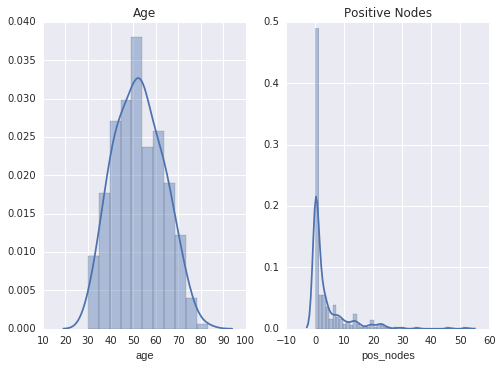

In [68]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
sns.distplot(surgery.age, ax=ax1)
ax1.set_title('Age')
sns.distplot(surgery.pos_nodes, ax=ax2)
ax2.set_title('Positive Nodes')
plt.show()

In [49]:
# y, X = dmatrices('status ~ age + pos_nodes', data=surgery, return_type='dataframe')
X = surgery.iloc[:,:3]
y = surgery.status.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print ('Accuracy Score: {}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Accuracy Score: 0.8152173913043478


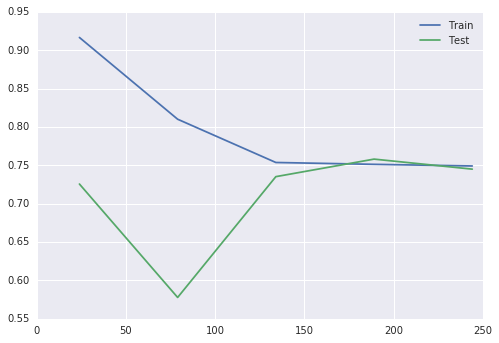

In [168]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    logreg, X, y, cv=5, n_jobs=1)

train_cv_scores = np.mean(train_scores, axis=1)
test_cv_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_cv_scores, label='Train')
plt.plot(train_sizes, test_cv_scores, label='Test')
plt.legend()
plt.show()

ROC Curve and AUC

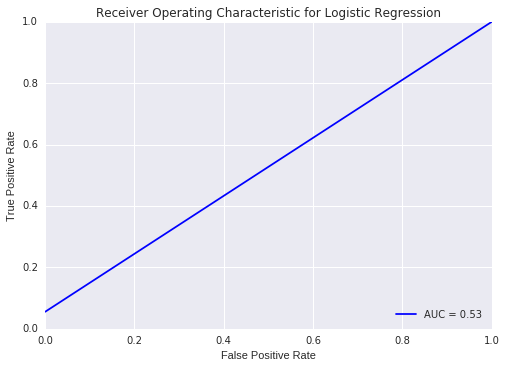

In [51]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

X = surgery.iloc[:,:3]
y = surgery.status.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])
y_test = np.array([number[0] for number in lb.fit_transform(y_test)])

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()